# Principal Component Analysis and Model Training

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [4]:
df = df.set_index('ID_code')

In [5]:
df.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [7]:
X = df.drop('target',axis=1)
y = df['target']

In [8]:
X.shape, y.shape

((200000, 200), (200000,))

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

Train test split is performed to divide dataset into 2 separate subsets, one for training the model and the other for evaluating its performance. The main purpose to assess how well the model generalizes to unseen data

In [11]:
X_train.shape, X_test.shape

((134000, 200), (66000, 200))

In [12]:
# Function to display evaluation score of models
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## StandardScaler and PCA -
Standard scaler is a preprocessing technique used to normalize the variables of dataset. It transforms the features of the dataset such that they have zero mean and unit variance. It helps in variance scaling, which ensures that all features are on a comparable scale, preventing features with larger variance from dominating the algorithms. It is less sensitive to outliers compared to other scaling techniques

PCA is a dimensionality reduction technique commonly used to transform high-dimensional datasets into a lower-dimensional space while preserving the most important patterns or relationships in the data. The main goal of PCA is to identify the directions (principal components) in the data that capture the maximum variance. These principal components are linear combinations of the original features and are orthogonal to each other. It helps in dimensionality reduction and noise reduction

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=200)

I have chosen number of components as 200 for dimensionality reduction. So in order to use the models to predict on test set, it is required to scale the data first and the perform PCA with components equal to 200

In [23]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [24]:
X_train.shape, X_test.shape

((134000, 200), (66000, 200))

Text(0, 0.5, 'Second Principal Component')

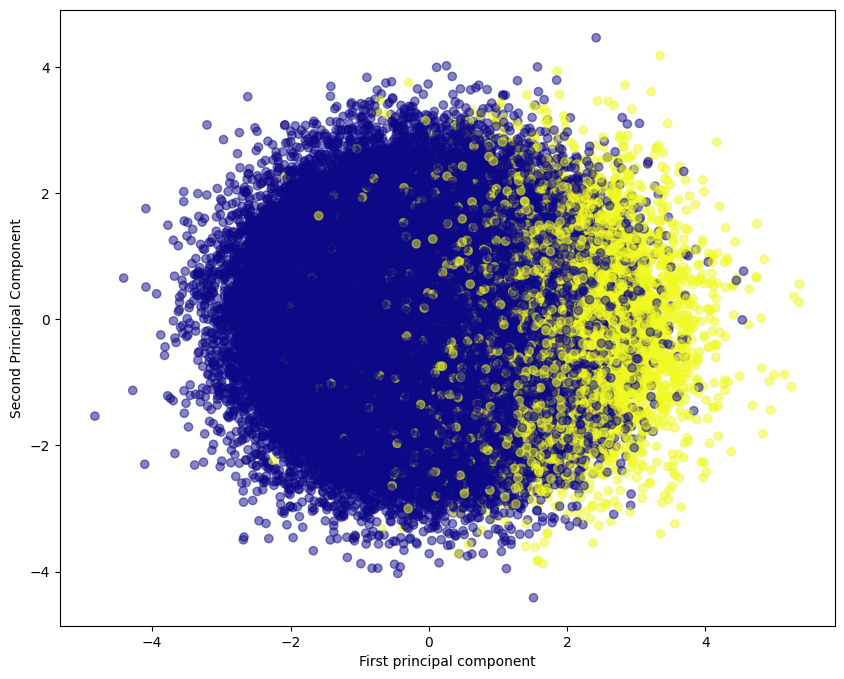

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='plasma',alpha=0.5)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

Visualization of first 2 principal components of the dataset and relation between them

# 

## Training different types of models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

## 1. Logistic Regression model with GridSearch for best hyper-parameters

In [ ]:
log_model = LogisticRegression(solver='saga',multi_class='ovr',max_iter=100)

Logistic regression is a statistical model used for binary classification tasks, where the goal is to predict the probability of an instance belonging to one of two possible classes. It is a supervised learning algorithm that models the relationship between a set of independent variables (features) and a binary dependent variable (target). 
In my model training i have used 'saga' (Stochastic Average Gradient descent) solver. Solver's are used to find the best set of coefficeints that minizes the cost function or maximize the likelihood of observed data. SAGA is designed to handle large-scale problems efficiently by updating the coefficients based on a randomly selected subset of training samples at each iteration. The "saga" solver supports both L1 (Lasso) and L2 (Ridge) regularization. Regularization helps prevent overfitting and can be controlled by the "penalty" parameter. 

In [ ]:
penalty = ['l1','l2']
C = np.logspace(0,4,10)

In [ ]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

GridSearch is a technique used for hyperparameter tuning in. Hyperparameters are configuration settings of an algorithm that are not learned from the data but are set prior to training. GridSearch automates the process of systematically searching through a predefined set of hyperparameters and finding the best combination that yields the optimal performance for a given model. The main idea behind GridSearch is to define a grid, or a combination of hyperparameters, and evaluate the model's performance for each possible combination of values in the grid. The performance is typically assessed using a cross-validation strategy to ensure a robust evaluation.

In [ ]:
print_score(grid_model, X_train, y_train, X_test, y_test, train=True)
print_score(grid_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.50%
_______________________________________________
CLASSIFICATION REPORT:
                       0             1  accuracy      macro avg   weighted avg
precision       0.924199      0.693843  0.914985       0.809021       0.901043
recall          0.986385      0.276095  0.914985       0.631240       0.914985
f1-score        0.954280      0.395008  0.914985       0.674644       0.898061
support    120530.000000  13470.000000  0.914985  134000.000000  134000.000000
_______________________________________________
Confusion Matrix: 
 [[118889   1641]
 [  9751   3719]]

Test Result:
Accuracy Score: 91.42%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.923859     0.682300  0.914182      0.803079      0.899600
recall         0.985852     0.272179  0.914182      0.629015      0.914182
f1-score       0.953849     0.389129  0.914182      0.671489 

After evaluating the model, i could infer that accuracy of my model on hold-out test set is 91.4%


In [ ]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

The parametrs chosen by gridsearch are penalty of L1 ie Lasso Regression and C value of 1

# 

In [16]:
from joblib import dump,load

In [ ]:
# Saving the model
dump(grid_model,'logistic_reg_model.joblib')

['logistic_reg_model.joblib']

# 

## 2. K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

KNN is a supervised learning algorithm used for classification as well as regression tasks. The key idea behind the KNN algorithm is that similar instances tend to have similar labels. Given a new, unlabeled instance, KNN finds the K nearest labeled instances (neighbors) in the training data based on a distance metric and assigns the most common label among its K neighbors as the predicted label for the new instance

I have chosen the value of K as 1, so my model considers 1st nearest neighbor for making predictions

In [ ]:
print_score(knn_model, X_train, y_train, X_test, y_test, train=True)
print_score(knn_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0        1  accuracy  macro avg  weighted avg
precision       1.0      1.0       1.0        1.0           1.0
recall          1.0      1.0       1.0        1.0           1.0
f1-score        1.0      1.0       1.0        1.0           1.0
support    120530.0  13470.0       1.0   134000.0      134000.0
_______________________________________________
Confusion Matrix: 
 [[120530      0]
 [     0  13470]]

Test Result:
Accuracy Score: 88.40%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.901497     0.177945     0.884      0.539721      0.828835
recall         0.977902     0.042849     0.884      0.510375      0.884000
f1-score       0.938146     0.069066     0.884      0.503606      0.850870
support    59372.000000  6628.000000     0.884  66000.000000

After evaluating the model, i could infer that accuracy of my model on hold-out test set is 88.4%, which is less as compared to Logistic Regression model

In [ ]:
# Saving the model
dump(knn_model,'KNN_model.joblib')

['KNN_model.joblib']

# 

### Test set predictions on the above 2 models
Read the test set, scale the data, perform PCA and the predict

In [3]:
testdf = pd.read_csv('test.csv')

In [4]:
testdf.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [5]:
testdf = testdf.set_index('ID_code')

In [6]:
testdf.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
ID_code,,,,,,,,,,,,,,,,,,,,,
test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,8.3442,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,7.4578,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,7.1437,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [11]:
scaler = StandardScaler()
scaled_test = scaler.fit_transform(testdf)

In [13]:
pca = PCA(n_components=200)
pc_test = pca.fit_transform(scaled_test)

In [14]:
pc_test.shape

(200000, 200)

In [15]:
scaled_test.shape

(200000, 200)

In [ ]:
log_grid_pred = grid_model.predict(pc_test)

In [ ]:
np.count_nonzero(log_grid_pred == 1)

6179

In [ ]:
knn_pred = knn_model.predict(pc_test)

In [ ]:
np.count_nonzero(knn_pred == 1)

4852

# 

## 3. Random Forest
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. Random Forest builds an ensemble of decision trees, where each tree is trained on a random subset of the training data. By aggregating the predictions from multiple trees, Random Forest provides more robust and accurate predictions compared to individual decision trees. During the construction of each decision tree, Random Forest selects a random subset of features to consider at each split. This random feature selection helps in reducing the correlation between trees and enables the model to handle high-dimensional datasets. For classification tasks, Random Forest combines the predictions from individual trees using majority voting. Each tree "votes" for a class label, and the class with the most votes becomes the final predicted class

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)

When you set random_state to a specific value, in my case to 0, it ensures that the random number generator used within the algorithm behaves in a deterministic manner. In other words, running the algorithm multiple times with the same random_state value will produce the same results

In [ ]:
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
print_score(rfc, X_train, y_train, X_test, y_test, train=True)
print_score(rfc, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                  0        1  accuracy  macro avg  weighted avg
precision       1.0      1.0       1.0        1.0           1.0
recall          1.0      1.0       1.0        1.0           1.0
f1-score        1.0      1.0       1.0        1.0           1.0
support    120530.0  13470.0       1.0   134000.0      134000.0
_______________________________________________
Confusion Matrix: 
 [[120530      0]
 [     0  13470]]

Test Result:
Accuracy Score: 91.23%
_______________________________________________
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.918913     0.705479  0.912303      0.812196      0.897479
recall         0.989861     0.217562  0.912303      0.603711      0.912303
f1-score       0.953068     0.332565  0.912303      0.642816      0.890755
support    59372.000000  6628.000000  0.912303  66000.000000

Random Forst Classifier gives an accuracy of 91.2% on the hold-out test set, which is better than KNN model and similar to the Logistic Regression model

In [ ]:
# Saving the model
dump(rfc,'radom_forest_model.joblib')

['/content/drive/MyDrive/Colab Notebooks/radom_forest_model.joblib']

# 

## Conclusion: 
### Out of the 3 models trained- Logistic Regression model with GridSearchCV, KNN and Random Forest Classifier, it can implied that the Logictic Regression model performed best on our dataset followed by Random Forest Classifier and KNN